In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [5]:
dfe = df.copy()

dfe['sex'] = enc.fit_transform(df['sex'])
dfe['smoker'] = enc.fit_transform(df['smoker'])
dfe['region'] = enc.fit_transform(df['region'])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfe.drop('charges', axis=1), dfe['charges'],\
                                                    test_size=0.2, random_state=42)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import ELU

In [8]:
from tensorflow.keras.backend import sqrt as Ksqrt
from tensorflow.keras.backend import mean as Kmean
from tensorflow.keras.backend import square as Ksquare

In [262]:
import os 
import tensorflow as tf
import random

In [267]:
# setting seed for reproducible results
def set_seed(seed_value=42):
    os.environ['PYTHONHASHSEED']=str(seed_value)
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

In [268]:
set_seed()

In [9]:
def root_mean_squared_error(y_true, y_pred):
        return Ksqrt(Kmean(Ksquare(y_pred - y_true))) 

In [10]:
def check_min_max(y_pred):
    print("Predicted values\n\nmax: {}\nmin: {}".format(np.max(y_pred), np.min(y_pred)))
    print("\nActual values\n\nmax: {}\nmin: {}".format(np.max(y_test), np.min(y_test)))

In [11]:
def epoc_plots(hist):
    fig, axs = plt.subplots(3, 1, figsize=(15,18))
    #1st plot
    axs[0].plot(hist.history['loss'], label='loss')
    axs[0].plot(hist.history['val_loss'], label='val_loss')
    axs[0].set_xlabel('Epocs', fontsize=12)
    axs[0].set_ylabel('Root Mean Squared Error (loss)', fontsize=12)
    axs[0].legend(loc='upper right', fontsize=12)

    #2nd plot 
    axs[1].plot(hist.history['mae'], label='mae')
    axs[1].plot(hist.history['val_mae'], label='val_mae')
    axs[1].set_xlabel('Epocs', fontsize=12)
    axs[1].set_ylabel('Mean Absolute Error', fontsize=12)
    axs[1].legend(loc='upper right', fontsize=12)

    #3rd plot 
    axs[2].plot(hist.history['mse'], label='mse')
    axs[2].plot(hist.history['val_mse'], label='val_mse')
    axs[2].set_xlabel('Epocs', fontsize=12)
    axs[2].set_ylabel('Mean Squared Error', fontsize=12)
    axs[2].legend(loc='upper right', fontsize=12)

    plt.tight_layout()

In [12]:
def regression_plots(y_pred, model):
    fig, axs = plt.subplots(2, 1, figsize=(15,12))
    #1st plot
    sns.scatterplot(model.predict(X_train).reshape(-1), y_train, ax=axs[0])
    axs[0].set_xlabel('Predicted Values', fontsize=12)
    axs[0].set_ylabel('Actual Values', fontsize=12)
    sns.lineplot(model.predict(X_train).reshape(-1), model.predict(X_train).reshape(-1), color='red', ax=axs[0])
    axs[0].set_title('Predictions for train data', fontsize=15)

    #2nd plot 
    sns.scatterplot(y_pred.reshape(-1), y_test, ax=axs[1])
    axs[1].set_xlabel('Predicted Values', fontsize=12)
    axs[1].set_ylabel('Actual Values', fontsize=12)
    sns.lineplot(y_pred.reshape(-1), y_pred.reshape(-1), color='red', ax=axs[1])
    axs[1].set_title('Predictions for test data', fontsize=15)

    plt.tight_layout()

In [13]:
# (one of) the reason for the need for weight init, and a different activation function
# was to avoid the issue of very low or very high values during the back prop 
# but a relatively simpler solution to this problem is to just normalize the values 
# and this method is known as Batch Normalization
# lets try that out now

In [14]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout

In [15]:
# previous model for reference
# # param count: 14,311
# model54 = Sequential() 

# model54.add(Dense(30, input_dim=6, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
# model54.add(Dense(30, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
# model54.add(Dense(30, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
# for _ in range(50):
#     model54.add(Dense(15, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))
# model54.add(Dense(1, activation=ELU(), kernel_initializer=VarianceScaling(1.5), bias_initializer='zeros'))

# model54.compile(loss=root_mean_squared_error, optimizer=Adam(0.001),
#              metrics=['mse', 'mae'])

In [73]:
# param count: 1,891 (+160)
model55 = Sequential() 

model55.add(Dense(20, input_dim=6))
model55.add(BatchNormalization())
model55.add(Activation(ELU()))


model55.add(Dense(30))
model55.add(BatchNormalization())
model55.add(Activation(ELU()))


model55.add(Dense(30))
model55.add(BatchNormalization())
model55.add(Activation(ELU()))

# for _ in range(50):
#     model55.add(Dense(15))
#     model55.add(BatchNormalization())
#     model55.add(Activation(ELU()))

model55.add(Dense(1, activation='relu'))

model55.compile(loss=root_mean_squared_error, optimizer=Adam(0.009),
             metrics=['mse', 'mae'])

In [75]:
history55 = model55.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 0s 8ms/step - loss: 17804.4473 - mse: 325423168.0000 - mae: 13516.9004 - val_loss: 17593.4688 - val_mse: 310368800.0000 - val_mae: 12655.5781
Epoch 2/300
14/14 [==============================] - 0s 145us/step - loss: 17949.4512 - mse: 325308160.0000 - mae: 13513.9941 - val_loss: 17565.9277 - val_mse: 309399392.0000 - val_mae: 12619.2930
Epoch 3/300
14/14 [==============================] - 0s 829us/step - loss: 17946.9590 - mse: 325154336.0000 - mae: 13510.6133 - val_loss: 17569.4805 - val_mse: 309524512.0000 - val_mae: 12624.5820
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 17918.5273 - mse: 324871936.0000 - mae: 13506.8320 - val_loss: 17537.0586 - val_mse: 308383680.0000 - val_mae: 12588.9072
Epoch 5/300
14/14 [==============================] - 0s 1ms/step - loss: 17937.1016 - mse: 324563392.0000 - mae: 13501.0410 - val_loss: 17506.1680 - val_mse: 307298944.0000 - val_mae: 12554.5049
Epoch 6/300
14/14 [==

Epoch 43/300
14/14 [==============================] - 0s 1ms/step - loss: 16380.5605 - mse: 271672032.0000 - mae: 12340.8281 - val_loss: 15445.8037 - val_mse: 239117968.0000 - val_mae: 11106.5586
Epoch 44/300
14/14 [==============================] - 0s 1ms/step - loss: 16323.3193 - mse: 269200800.0000 - mae: 12286.4932 - val_loss: 15485.8877 - val_mse: 240385984.0000 - val_mae: 11236.2324
Epoch 45/300
14/14 [==============================] - 0s 1ms/step - loss: 16264.0703 - mse: 266878416.0000 - mae: 12229.4102 - val_loss: 15708.6865 - val_mse: 247386224.0000 - val_mae: 11353.8975
Epoch 46/300
14/14 [==============================] - 0s 1ms/step - loss: 16142.4102 - mse: 264541296.0000 - mae: 12166.4287 - val_loss: 15340.2871 - val_mse: 235843792.0000 - val_mae: 11155.1904
Epoch 47/300
14/14 [==============================] - 0s 1ms/step - loss: 16082.5557 - mse: 262203760.0000 - mae: 12118.8818 - val_loss: 14449.5957 - val_mse: 209274880.0000 - val_mae: 10136.7080
Epoch 48/300
14/14 [

Epoch 85/300
14/14 [==============================] - 0s 1ms/step - loss: 12286.6484 - mse: 154343360.0000 - mae: 9145.3193 - val_loss: 11593.9619 - val_mse: 134689440.0000 - val_mae: 8731.6904
Epoch 86/300
14/14 [==============================] - 0s 1ms/step - loss: 12126.4062 - mse: 152035728.0000 - mae: 9100.9688 - val_loss: 9264.3857 - val_mse: 86053944.0000 - val_mae: 5474.1465
Epoch 87/300
14/14 [==============================] - 0s 1ms/step - loss: 12102.5068 - mse: 147876144.0000 - mae: 8953.4473 - val_loss: 12248.4629 - val_mse: 150413440.0000 - val_mae: 8988.3193
Epoch 88/300
14/14 [==============================] - 0s 1ms/step - loss: 11897.6387 - mse: 145660480.0000 - mae: 8913.4561 - val_loss: 9300.3193 - val_mse: 86668680.0000 - val_mae: 6009.5923
Epoch 89/300
14/14 [==============================] - 0s 1ms/step - loss: 11818.7754 - mse: 141837008.0000 - mae: 8783.1016 - val_loss: 10389.4775 - val_mse: 108150192.0000 - val_mae: 7633.0586
Epoch 90/300
14/14 [==============

Epoch 128/300
14/14 [==============================] - 0s 1ms/step - loss: 6829.1719 - mse: 51174780.0000 - mae: 4735.6357 - val_loss: 5643.1343 - val_mse: 32117684.0000 - val_mae: 3123.0923
Epoch 129/300
14/14 [==============================] - 0s 1ms/step - loss: 6870.7681 - mse: 49797784.0000 - mae: 4457.1006 - val_loss: 7728.1929 - val_mse: 59930300.0000 - val_mae: 5393.7344
Epoch 130/300
14/14 [==============================] - 0s 1ms/step - loss: 6722.4434 - mse: 47560192.0000 - mae: 4403.7466 - val_loss: 5297.1738 - val_mse: 28324046.0000 - val_mae: 3297.9673
Epoch 131/300
14/14 [==============================] - 0s 1ms/step - loss: 6767.6787 - mse: 49275724.0000 - mae: 4402.6099 - val_loss: 7525.8354 - val_mse: 56915228.0000 - val_mae: 5260.6685
Epoch 132/300
14/14 [==============================] - 0s 1ms/step - loss: 6472.0396 - mse: 45767824.0000 - mae: 4211.9805 - val_loss: 5386.4761 - val_mse: 29296250.0000 - val_mae: 3375.9548
Epoch 133/300
14/14 [========================

Epoch 171/300
14/14 [==============================] - 0s 1ms/step - loss: 4820.9297 - mse: 24507512.0000 - mae: 2831.0586 - val_loss: 4636.5156 - val_mse: 21640492.0000 - val_mae: 2901.5227
Epoch 172/300
14/14 [==============================] - 0s 1ms/step - loss: 5031.1372 - mse: 26274184.0000 - mae: 2926.2996 - val_loss: 4859.5557 - val_mse: 23804282.0000 - val_mae: 2621.7546
Epoch 173/300
14/14 [==============================] - 0s 1ms/step - loss: 4784.8848 - mse: 23820426.0000 - mae: 2803.1746 - val_loss: 4890.3901 - val_mse: 24220562.0000 - val_mae: 2442.0728
Epoch 174/300
14/14 [==============================] - 0s 1ms/step - loss: 4896.0464 - mse: 24476340.0000 - mae: 2930.8843 - val_loss: 5307.9902 - val_mse: 28572074.0000 - val_mae: 3110.9597
Epoch 175/300
14/14 [==============================] - 0s 1ms/step - loss: 4782.7954 - mse: 23773428.0000 - mae: 2847.2078 - val_loss: 4892.1211 - val_mse: 24240066.0000 - val_mae: 2455.9287
Epoch 176/300
14/14 [========================

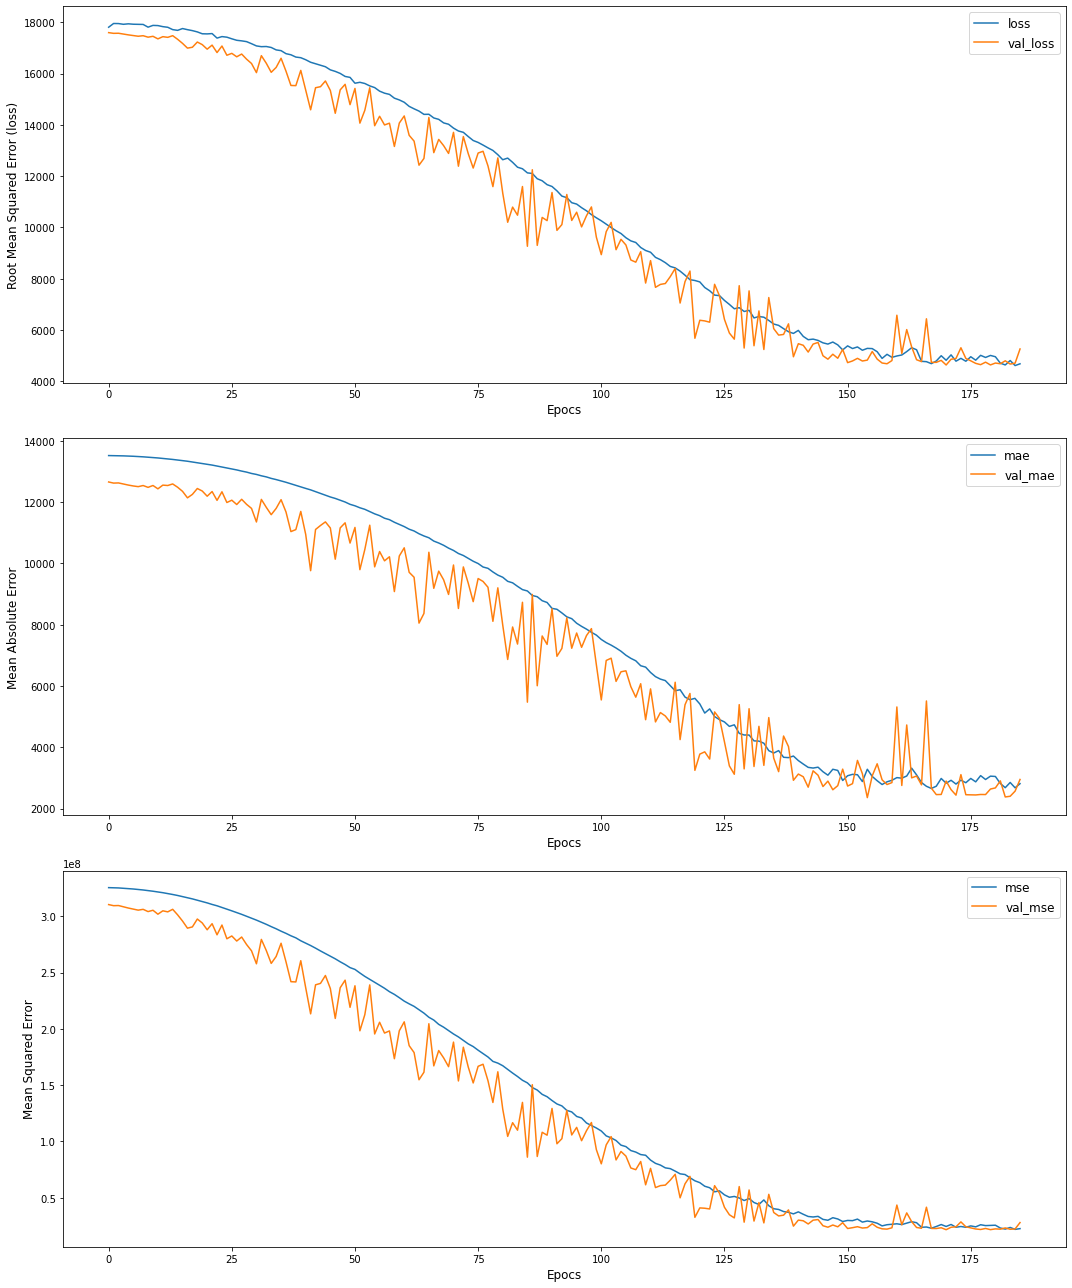

In [76]:
epoc_plots(history55)

In [77]:
y_pred55 = model55.predict(X_test)
r2_score(y_test, y_pred55) 

0.8280825652160588

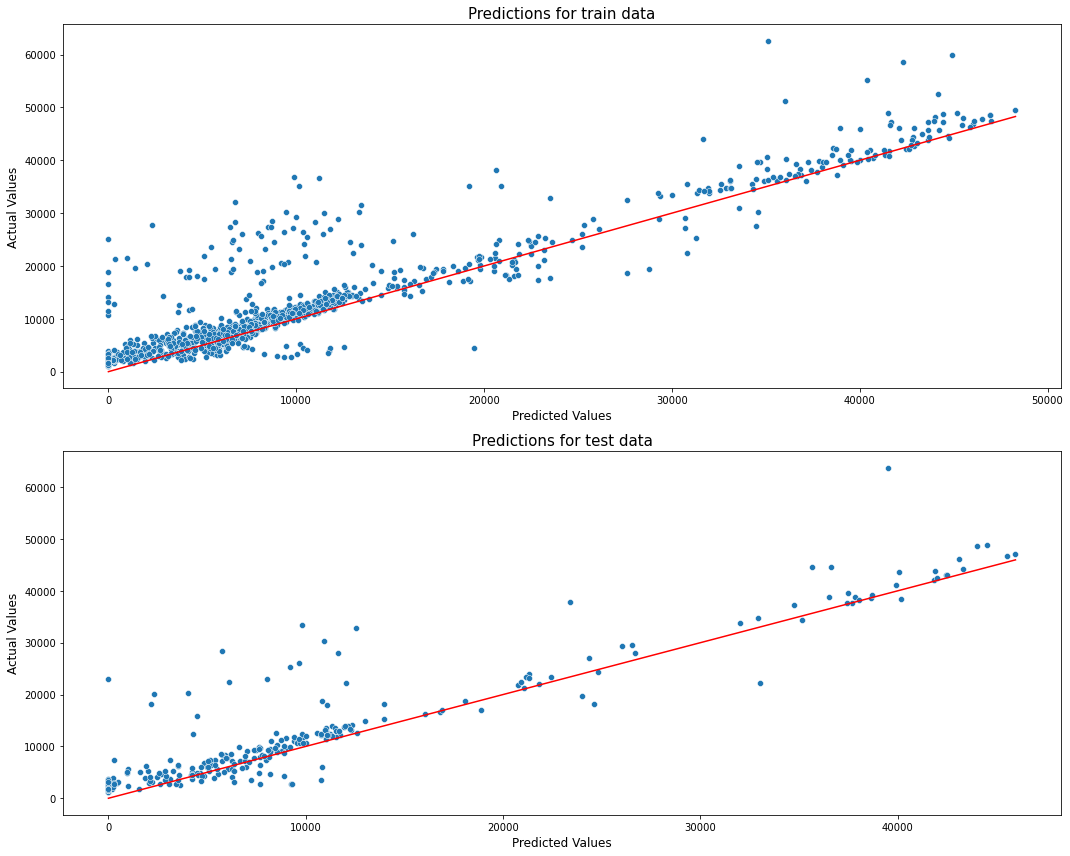

In [78]:
regression_plots(y_pred55, model55)

In [79]:
check_min_max(y_pred55)

Predicted values

max: 45967.5625
min: 0.0

Actual values

max: 63770.42801
min: 1131.5066


In [80]:
# batch norm model just refused to train for a bigger arch
# I tried changing the learning rate from 0.0001 - 0.1, no result
# (I even tried amsgrad = True)
# then I decrerased the param count for the model, and it starting learning
# not a great model, but the param count is also very low
# PS same model with amsgrad=True got 0.83 r2 scor, though I didn't save that one

# let me try to slowly increase the model arch complexity

In [92]:
# param count: 4,151 (+280)
model56 = Sequential() 

model56.add(Dense(20, input_dim=6))
model56.add(BatchNormalization())
model56.add(Activation(ELU()))


# model56.add(Dense(30))
# model56.add(BatchNormalization())
# model56.add(Activation(ELU()))

for _ in range(4):
    model56.add(Dense(30))
    model56.add(BatchNormalization())
    model56.add(Activation(ELU()))

model56.add(Dense(1, activation='relu'))

model56.compile(loss=root_mean_squared_error, optimizer=Adam(0.009),
             metrics=['mse', 'mae'])

In [94]:
history56 = model56.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 0s 10ms/step - loss: 17928.9492 - mse: 325401504.0000 - mae: 13516.3672 - val_loss: 17575.0684 - val_mse: 309721056.0000 - val_mae: 12630.7881
Epoch 2/300
14/14 [==============================] - 0s 1ms/step - loss: 17971.3086 - mse: 325264096.0000 - mae: 13513.9180 - val_loss: 17575.8145 - val_mse: 309746816.0000 - val_mae: 12634.2012
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 17963.8340 - mse: 325080384.0000 - mae: 13511.0811 - val_loss: 17558.6582 - val_mse: 309140416.0000 - val_mae: 12619.7598
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 17935.4707 - mse: 324868544.0000 - mae: 13506.6484 - val_loss: 17575.5215 - val_mse: 309733344.0000 - val_mae: 12639.2324
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 17946.0742 - mse: 324618400.0000 - mae: 13501.5420 - val_loss: 17538.5996 - val_mse: 308433600.0000 - val_mae: 12605.2139
Epoch 6/300
14/14 [=====

Epoch 43/300
14/14 [==============================] - 0s 1ms/step - loss: 16693.7363 - mse: 284735648.0000 - mae: 12608.9814 - val_loss: 16237.4004 - val_mse: 264315680.0000 - val_mae: 11767.2344
Epoch 44/300
14/14 [==============================] - 0s 1ms/step - loss: 16664.2129 - mse: 282895872.0000 - mae: 12573.4746 - val_loss: 16109.9941 - val_mse: 260238592.0000 - val_mae: 11557.0713
Epoch 45/300
14/14 [==============================] - 0s 1ms/step - loss: 16685.0879 - mse: 280783392.0000 - mae: 12533.2998 - val_loss: 15089.9443 - val_mse: 228282720.0000 - val_mae: 10590.1260
Epoch 46/300
14/14 [==============================] - 0s 2ms/step - loss: 16624.6172 - mse: 278871264.0000 - mae: 12490.2275 - val_loss: 15764.8271 - val_mse: 249091120.0000 - val_mae: 11433.2275
Epoch 47/300
14/14 [==============================] - 0s 1ms/step - loss: 16571.0566 - mse: 277002976.0000 - mae: 12444.5156 - val_loss: 15850.9043 - val_mse: 251863840.0000 - val_mae: 11542.0576
Epoch 48/300
14/14 [

Epoch 85/300
14/14 [==============================] - 0s 2ms/step - loss: 13638.7422 - mse: 191184720.0000 - mae: 10215.2686 - val_loss: 11204.1299 - val_mse: 125828984.0000 - val_mae: 6979.0596
Epoch 86/300
14/14 [==============================] - 0s 2ms/step - loss: 13618.1670 - mse: 188456096.0000 - mae: 10152.7939 - val_loss: 11822.4893 - val_mse: 140097072.0000 - val_mae: 8277.4863
Epoch 87/300
14/14 [==============================] - 0s 2ms/step - loss: 13479.8701 - mse: 185704432.0000 - mae: 10085.4277 - val_loss: 11026.9814 - val_mse: 121810248.0000 - val_mae: 7220.8862
Epoch 88/300
14/14 [==============================] - 0s 2ms/step - loss: 13365.7842 - mse: 183414064.0000 - mae: 10034.2227 - val_loss: 11625.2324 - val_mse: 135476992.0000 - val_mae: 8047.8398
Epoch 89/300
14/14 [==============================] - 0s 2ms/step - loss: 13306.2031 - mse: 179741760.0000 - mae: 9946.2744 - val_loss: 11330.1182 - val_mse: 128735784.0000 - val_mae: 7298.6377
Epoch 90/300
14/14 [======

14/14 [==============================] - 0s 2ms/step - loss: 9388.0469 - mse: 89991664.0000 - mae: 6775.7598 - val_loss: 8581.4248 - val_mse: 73874744.0000 - val_mae: 6171.8247
Epoch 128/300
14/14 [==============================] - 0s 2ms/step - loss: 9257.5938 - mse: 87052288.0000 - mae: 6643.1465 - val_loss: 8639.8740 - val_mse: 74879128.0000 - val_mae: 6015.4790
Epoch 129/300
14/14 [==============================] - 0s 2ms/step - loss: 9103.7529 - mse: 85427408.0000 - mae: 6589.5894 - val_loss: 8593.9316 - val_mse: 74050768.0000 - val_mae: 6179.6216
Epoch 130/300
14/14 [==============================] - 0s 2ms/step - loss: 9001.9580 - mse: 83724672.0000 - mae: 6453.9731 - val_loss: 7916.4702 - val_mse: 62920304.0000 - val_mae: 5222.4326
Epoch 131/300
14/14 [==============================] - 0s 2ms/step - loss: 8898.4297 - mse: 81846128.0000 - mae: 6346.3574 - val_loss: 9782.3291 - val_mse: 95871904.0000 - val_mae: 7230.4604
Epoch 132/300
14/14 [==============================] - 0s 2

Epoch 170/300
14/14 [==============================] - 0s 2ms/step - loss: 5524.3154 - mse: 32072392.0000 - mae: 3419.7949 - val_loss: 5649.6172 - val_mse: 32208818.0000 - val_mae: 3406.4121
Epoch 171/300
14/14 [==============================] - 0s 2ms/step - loss: 5583.6143 - mse: 33207506.0000 - mae: 3398.9998 - val_loss: 5043.4604 - val_mse: 25556354.0000 - val_mae: 3515.2400
Epoch 172/300
14/14 [==============================] - 0s 2ms/step - loss: 5399.8301 - mse: 30208808.0000 - mae: 3266.1658 - val_loss: 4957.1060 - val_mse: 24749740.0000 - val_mae: 2848.6807
Epoch 173/300
14/14 [==============================] - 0s 2ms/step - loss: 5417.7568 - mse: 30883388.0000 - mae: 3330.2581 - val_loss: 5809.5767 - val_mse: 33936804.0000 - val_mae: 3500.5151
Epoch 174/300
14/14 [==============================] - 0s 2ms/step - loss: 5397.0171 - mse: 31696130.0000 - mae: 3253.7632 - val_loss: 5361.4653 - val_mse: 28993282.0000 - val_mae: 3088.8130
Epoch 175/300
14/14 [========================

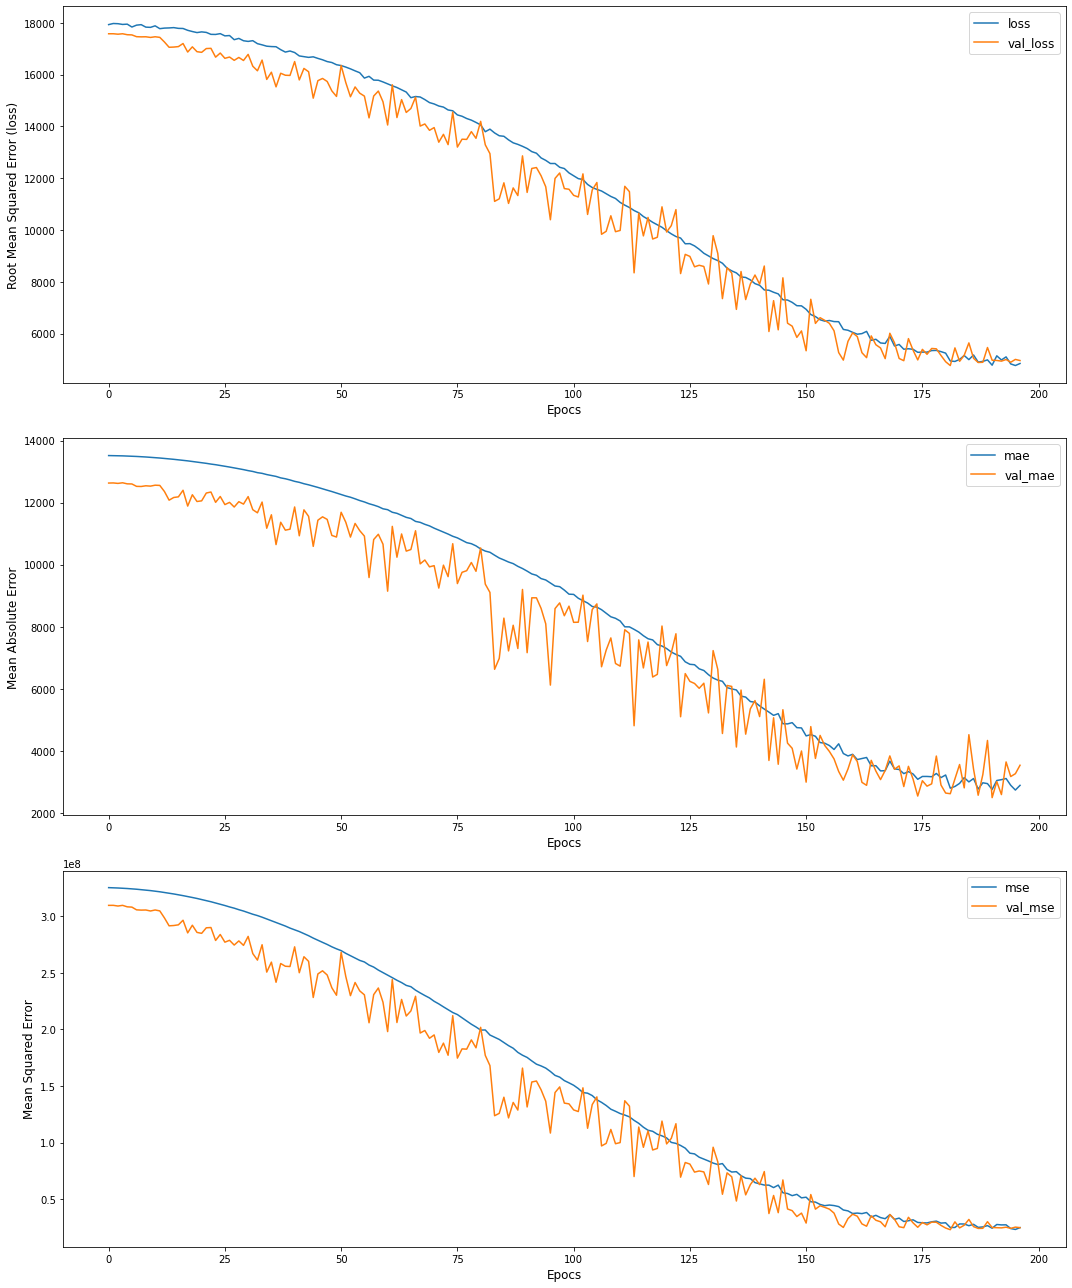

In [95]:
epoc_plots(history56)

In [96]:
y_pred56 = model56.predict(X_test)
r2_score(y_test, y_pred56) 

0.8334438303611434

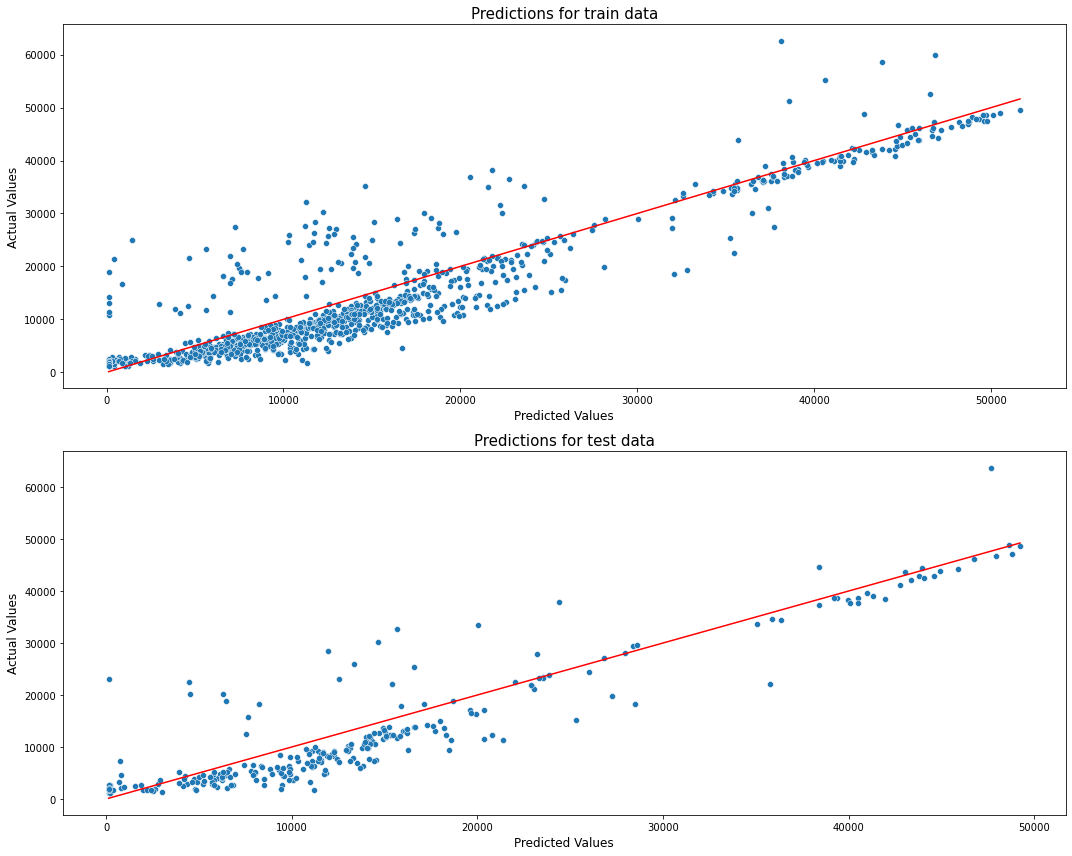

In [97]:
regression_plots(y_pred56, model56)

In [98]:
check_min_max(y_pred56)

Predicted values

max: 49243.70703125
min: 120.1524887084961

Actual values

max: 63770.42801
min: 1131.5066


In [111]:
# double the param count, but barely improved r2 score
# hmm, let me try a deepeer arch with similar param count
# (does not learn!)
# lets try less layers, more neurons

In [127]:
# param count: 8,451 (+400)
model57 = Sequential() 

model57.add(Dense(50, input_dim=6))
model57.add(BatchNormalization())
model57.add(Activation(ELU()))


for _ in range(3):
    model57.add(Dense(50))
    model57.add(BatchNormalization())
    model57.add(Activation(ELU()))

model57.add(Dense(1, activation='relu'))

model57.compile(loss=root_mean_squared_error, optimizer=Adam(0.01),
             metrics=['mse', 'mae'])

In [129]:
history57 = model57.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 0s 10ms/step - loss: 17920.1406 - mse: 325342144.0000 - mae: 13515.0342 - val_loss: 17498.2715 - val_mse: 307022368.0000 - val_mae: 12533.8984
Epoch 2/300
14/14 [==============================] - 0s 1ms/step - loss: 17946.5605 - mse: 325144608.0000 - mae: 13510.3594 - val_loss: 17536.1465 - val_mse: 308352320.0000 - val_mae: 12583.8691
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 17903.1250 - mse: 324772736.0000 - mae: 13505.3027 - val_loss: 17484.8340 - val_mse: 306549664.0000 - val_mae: 12529.6182
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 17953.1582 - mse: 324345024.0000 - mae: 13496.3096 - val_loss: 17412.6797 - val_mse: 304023648.0000 - val_mae: 12459.3320
Epoch 5/300
14/14 [==============================] - 0s 1ms/step - loss: 17877.4121 - mse: 323798112.0000 - mae: 13485.8379 - val_loss: 17453.6465 - val_mse: 305455648.0000 - val_mae: 12532.6855
Epoch 6/300
14/14 [=====

Epoch 43/300
14/14 [==============================] - 0s 2ms/step - loss: 14907.2520 - mse: 225398960.0000 - mae: 11213.0215 - val_loss: 14032.1064 - val_mse: 197354960.0000 - val_mae: 10104.5420
Epoch 44/300
14/14 [==============================] - 0s 2ms/step - loss: 14730.5732 - mse: 221461760.0000 - mae: 11093.7061 - val_loss: 13872.1113 - val_mse: 192854032.0000 - val_mae: 10122.1562
Epoch 45/300
14/14 [==============================] - 0s 1ms/step - loss: 14630.8711 - mse: 216782064.0000 - mae: 10987.6367 - val_loss: 13043.4170 - val_mse: 170562768.0000 - val_mae: 9303.7158
Epoch 46/300
14/14 [==============================] - 0s 1ms/step - loss: 14497.6729 - mse: 212762016.0000 - mae: 10884.6650 - val_loss: 12751.4170 - val_mse: 162977984.0000 - val_mae: 8993.5488
Epoch 47/300
14/14 [==============================] - 0s 2ms/step - loss: 14330.2002 - mse: 208789056.0000 - mae: 10750.4541 - val_loss: 14563.1729 - val_mse: 212452912.0000 - val_mae: 10779.8672
Epoch 48/300
14/14 [==

14/14 [==============================] - 0s 2ms/step - loss: 7576.6792 - mse: 59656640.0000 - mae: 5229.5576 - val_loss: 6808.3345 - val_mse: 46640620.0000 - val_mae: 3941.0742
Epoch 86/300
14/14 [==============================] - 0s 2ms/step - loss: 7235.1157 - mse: 60456500.0000 - mae: 4998.1787 - val_loss: 6459.1499 - val_mse: 42103148.0000 - val_mae: 3765.6196
Epoch 87/300
14/14 [==============================] - 0s 2ms/step - loss: 7226.5049 - mse: 54975200.0000 - mae: 4942.1411 - val_loss: 6019.0293 - val_mse: 36566060.0000 - val_mae: 3341.3931
Epoch 88/300
14/14 [==============================] - 0s 2ms/step - loss: 7178.7734 - mse: 53973596.0000 - mae: 4801.3516 - val_loss: 5909.6045 - val_mse: 35461616.0000 - val_mae: 2991.3201
Epoch 89/300
14/14 [==============================] - 0s 2ms/step - loss: 6939.7227 - mse: 50967228.0000 - mae: 4624.2808 - val_loss: 5462.9058 - val_mse: 30290744.0000 - val_mae: 3014.9863
Epoch 90/300
14/14 [==============================] - 0s 2ms/st

14/14 [==============================] - 0s 2ms/step - loss: 4559.2036 - mse: 22278218.0000 - mae: 2633.0310 - val_loss: 6546.5444 - val_mse: 43051008.0000 - val_mae: 5526.6938
Epoch 129/300
14/14 [==============================] - 0s 2ms/step - loss: 4696.0532 - mse: 23597960.0000 - mae: 2765.6477 - val_loss: 5232.6201 - val_mse: 27516818.0000 - val_mae: 4059.3423
Epoch 130/300
14/14 [==============================] - 0s 2ms/step - loss: 4804.4106 - mse: 23729698.0000 - mae: 2894.3044 - val_loss: 4716.8970 - val_mse: 22338098.0000 - val_mae: 3177.4595
Epoch 131/300
14/14 [==============================] - 0s 2ms/step - loss: 4801.0527 - mse: 24683208.0000 - mae: 2778.2759 - val_loss: 4925.1274 - val_mse: 24307748.0000 - val_mae: 3361.8435
Epoch 132/300
14/14 [==============================] - 0s 2ms/step - loss: 4860.4399 - mse: 24178554.0000 - mae: 2982.7952 - val_loss: 4801.7705 - val_mse: 23105122.0000 - val_mae: 2976.1284
Epoch 133/300
14/14 [==============================] - 0s 2

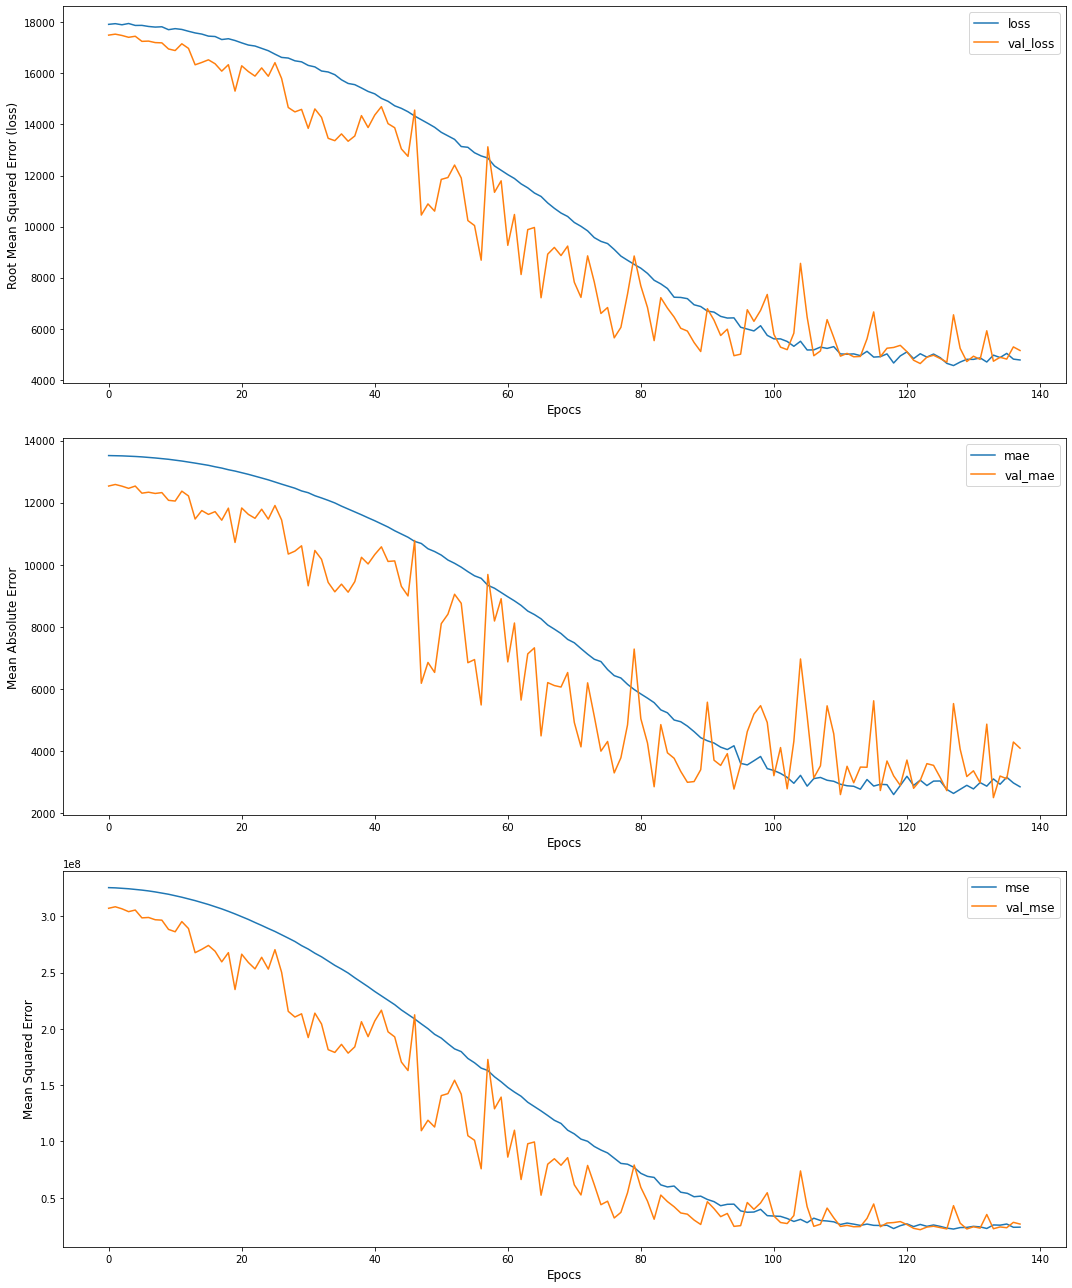

In [130]:
epoc_plots(history57)

In [131]:
y_pred57 = model57.predict(X_test)
r2_score(y_test, y_pred57) 

0.8322998447502674

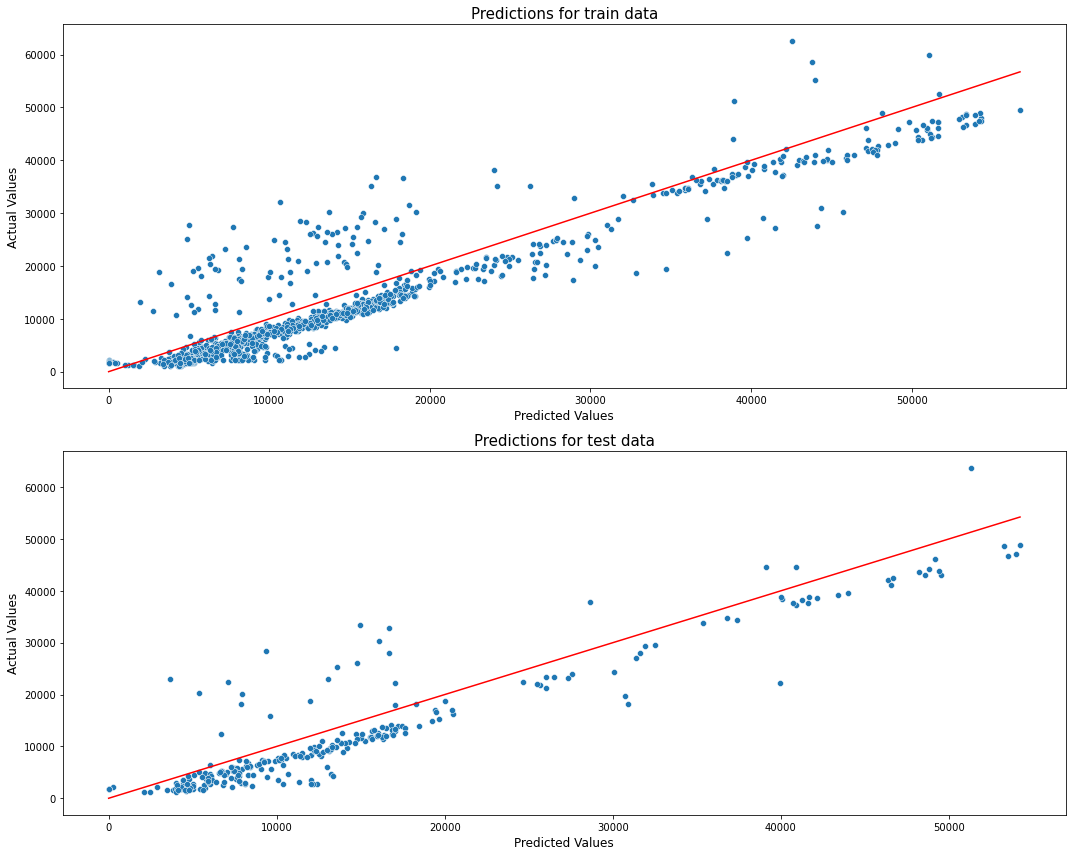

In [132]:
regression_plots(y_pred57, model57)

In [133]:
check_min_max(y_pred57)

Predicted values

max: 54231.61328125
min: 0.0

Actual values

max: 63770.42801
min: 1131.5066


In [134]:
# a lot more params, but almost the same r2 score
# but the prediction distribution is better than before 
# hmmm, lets try to improve a smaller net then

# I instead went online to read some basic regression batch norm
# keras code, and copied one from an article below
# I made some basic changes to fit the data

In [143]:
# param count: 38,657 (+896)
model58 = Sequential([
    Dense(64, input_shape=(6,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='relu')
])


model58.compile(loss=root_mean_squared_error, optimizer=Adam(0.01),
             metrics=['mse', 'mae'])

In [145]:
history58 = model58.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 0s 10ms/step - loss: 17941.4805 - mse: 325276288.0000 - mae: 13513.3203 - val_loss: 17481.4434 - val_mse: 306425088.0000 - val_mae: 12526.8135
Epoch 2/300
14/14 [==============================] - 0s 2ms/step - loss: 17949.7168 - mse: 324927712.0000 - mae: 13505.5303 - val_loss: 17415.3242 - val_mse: 304106912.0000 - val_mae: 12459.0576
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 17876.9199 - mse: 324298816.0000 - mae: 13495.7695 - val_loss: 17432.7422 - val_mse: 304708096.0000 - val_mae: 12494.5225
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 17884.8613 - mse: 323376320.0000 - mae: 13481.7559 - val_loss: 17468.9922 - val_mse: 305988736.0000 - val_mae: 12563.5723
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 17866.2930 - mse: 322195456.0000 - mae: 13459.4648 - val_loss: 17588.4648 - val_mse: 310186592.0000 - val_mae: 12651.0947
Epoch 6/300
14/14 [=====

14/14 [==============================] - 0s 2ms/step - loss: 10382.9121 - mse: 112477864.0000 - mae: 7749.0518 - val_loss: 6220.5928 - val_mse: 38901836.0000 - val_mae: 4048.4587
Epoch 44/300
14/14 [==============================] - 0s 2ms/step - loss: 10120.4873 - mse: 105921936.0000 - mae: 7439.2236 - val_loss: 6333.4922 - val_mse: 40208572.0000 - val_mae: 4317.4385
Epoch 45/300
14/14 [==============================] - 0s 2ms/step - loss: 9866.0732 - mse: 99581216.0000 - mae: 7184.9883 - val_loss: 6545.3857 - val_mse: 43050012.0000 - val_mae: 4711.1714
Epoch 46/300
14/14 [==============================] - 0s 2ms/step - loss: 9609.8809 - mse: 95833176.0000 - mae: 7008.5703 - val_loss: 5700.5278 - val_mse: 32777846.0000 - val_mae: 3249.9937
Epoch 47/300
14/14 [==============================] - 0s 2ms/step - loss: 9213.8838 - mse: 87842784.0000 - mae: 6593.7773 - val_loss: 7065.8828 - val_mse: 50232440.0000 - val_mae: 5116.9170
Epoch 48/300
14/14 [==============================] - 0s 2m

14/14 [==============================] - 0s 2ms/step - loss: 4834.1694 - mse: 24652872.0000 - mae: 2854.6282 - val_loss: 5624.5439 - val_mse: 31785026.0000 - val_mae: 5062.0830
Epoch 87/300
14/14 [==============================] - 0s 2ms/step - loss: 4982.4521 - mse: 25335684.0000 - mae: 3190.9500 - val_loss: 4881.0947 - val_mse: 24041274.0000 - val_mae: 3743.6289
Epoch 88/300
14/14 [==============================] - 0s 2ms/step - loss: 4980.8013 - mse: 27270178.0000 - mae: 3046.5266 - val_loss: 7893.5000 - val_mse: 62408004.0000 - val_mae: 4599.3726
Epoch 89/300
14/14 [==============================] - 0s 2ms/step - loss: 4986.6123 - mse: 25493472.0000 - mae: 3009.9231 - val_loss: 4946.9146 - val_mse: 24651798.0000 - val_mae: 3080.6724
Epoch 90/300
14/14 [==============================] - 0s 2ms/step - loss: 4757.1050 - mse: 23906984.0000 - mae: 3027.8149 - val_loss: 12958.0762 - val_mse: 168543936.0000 - val_mae: 10008.7656
Epoch 91/300
14/14 [==============================] - 0s 2ms

14/14 [==============================] - 0s 2ms/step - loss: 4765.3145 - mse: 23280640.0000 - mae: 2961.1177 - val_loss: 4930.7393 - val_mse: 24661228.0000 - val_mae: 3344.3062
Epoch 130/300
14/14 [==============================] - 0s 2ms/step - loss: 4696.6206 - mse: 22543992.0000 - mae: 2849.2444 - val_loss: 4831.2271 - val_mse: 23716324.0000 - val_mae: 2562.2053
Epoch 131/300
14/14 [==============================] - 0s 2ms/step - loss: 4738.6714 - mse: 22895836.0000 - mae: 3035.5273 - val_loss: 4707.4937 - val_mse: 22461046.0000 - val_mae: 2327.6028
Epoch 132/300
14/14 [==============================] - 0s 2ms/step - loss: 4577.7598 - mse: 21592776.0000 - mae: 2733.8350 - val_loss: 4895.8340 - val_mse: 24254732.0000 - val_mae: 2833.3840
Epoch 133/300
14/14 [==============================] - 0s 2ms/step - loss: 4864.4829 - mse: 24454600.0000 - mae: 3021.3025 - val_loss: 5561.8164 - val_mse: 32886024.0000 - val_mae: 2843.6411
Epoch 134/300
14/14 [==============================] - 0s 2

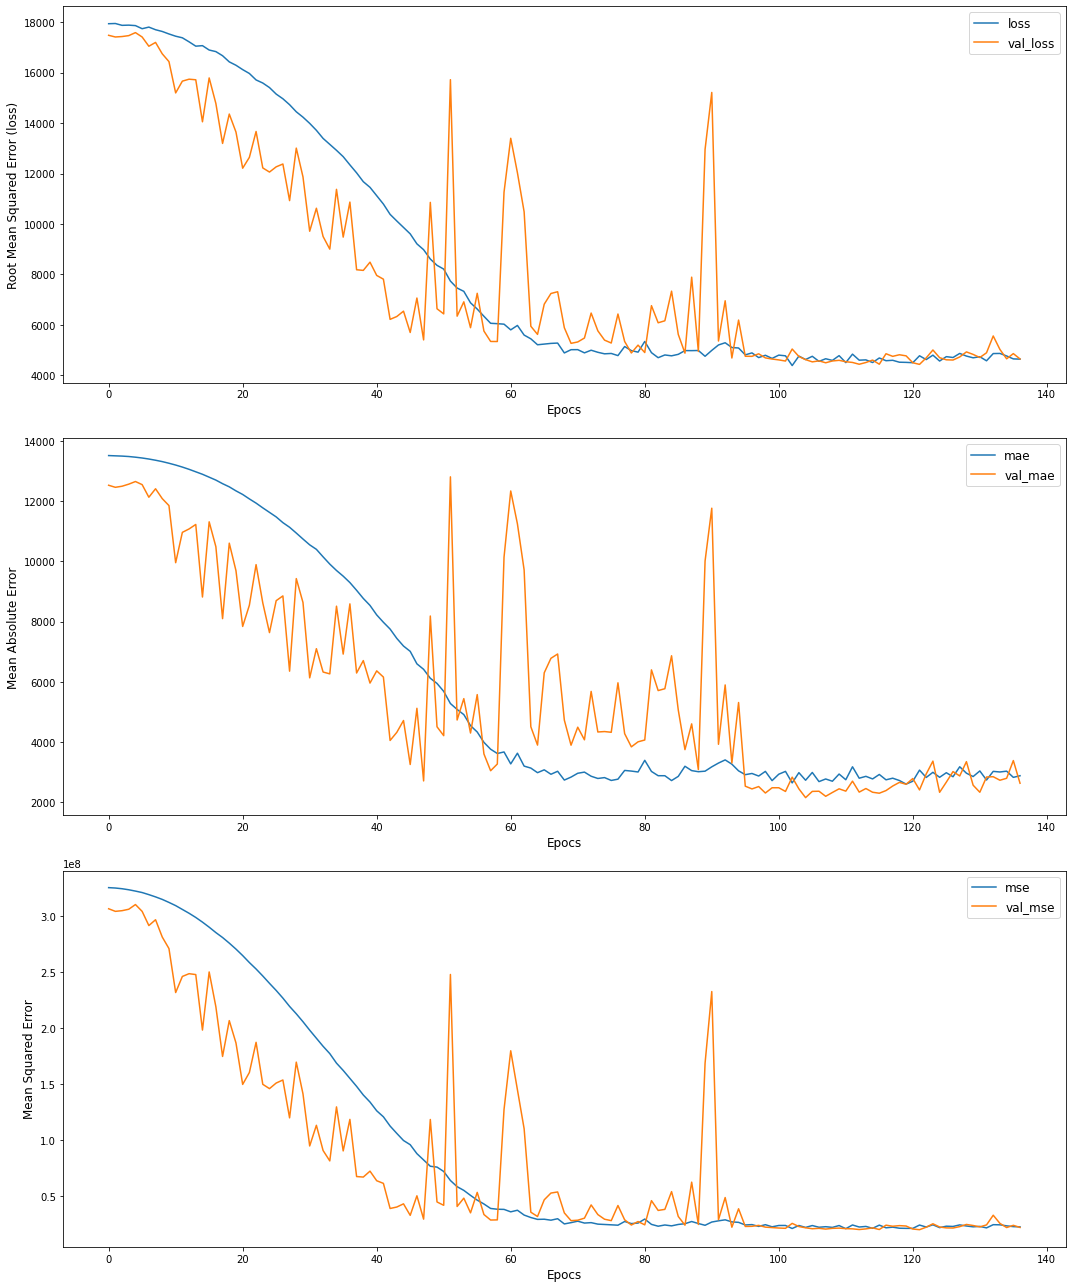

In [146]:
epoc_plots(history58)

In [147]:
y_pred58 = model58.predict(X_test)
r2_score(y_test, y_pred58) 

0.8720821736459621

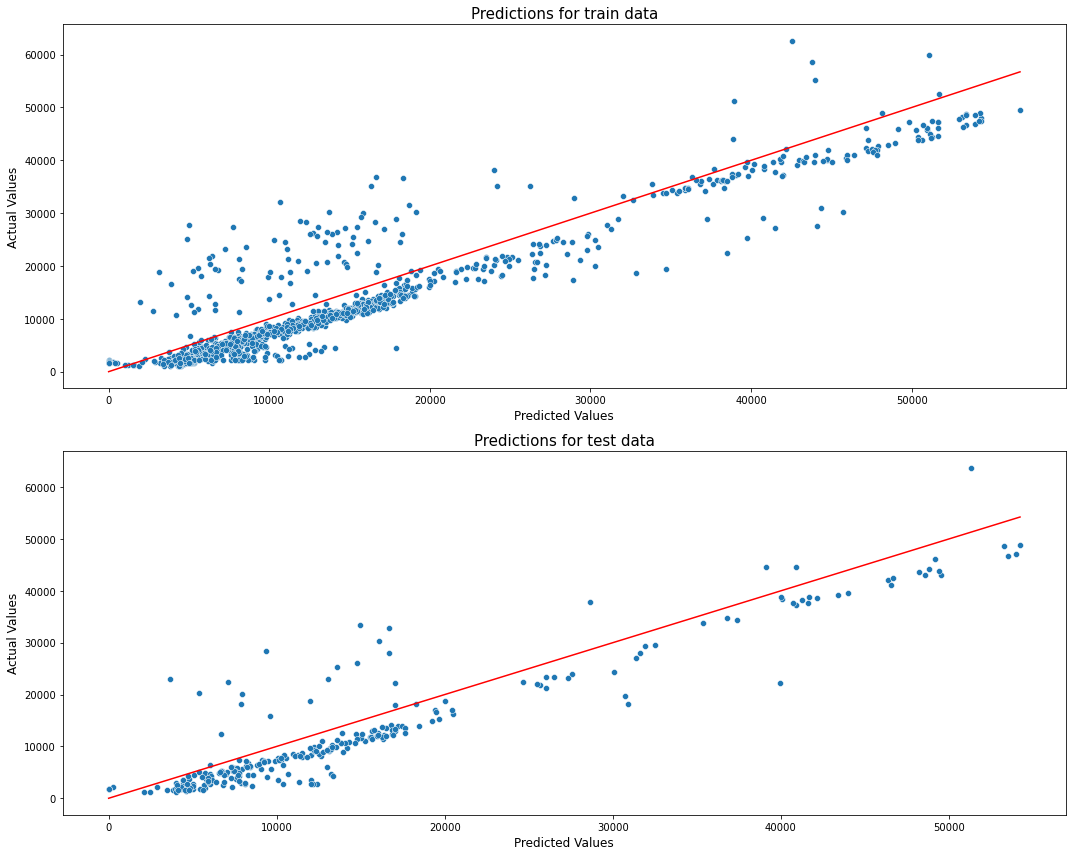

In [148]:
regression_plots(y_pred57, model57)

In [149]:
check_min_max(y_pred58)

Predicted values

max: 49735.9375
min: 0.0

Actual values

max: 63770.42801
min: 1131.5066


In [151]:
# I don't like the fact that the model that I copied 
# ran this well
# that being said I've had similar r2 scores with a third of this model's param count
# so I still wouldn't call this a great model

In [154]:
# param count: 11,169 (+448)
model59 = Sequential() 

model59.add(Dense(32, input_dim=6))
model59.add(BatchNormalization())
model59.add(Activation(ELU()))


for _ in range(3):
    model59.add(Dense(64))
    model59.add(BatchNormalization())
    model59.add(Activation(ELU()))

model59.add(Dense(1, activation='relu'))

model59.compile(loss=root_mean_squared_error, optimizer=Adam(0.01),
             metrics=['mse', 'mae'])

In [156]:
history59 = model59.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 0s 9ms/step - loss: 17979.2656 - mse: 325343328.0000 - mae: 13514.8809 - val_loss: 17557.6289 - val_mse: 309106208.0000 - val_mae: 12610.9697
Epoch 2/300
14/14 [==============================] - 0s 2ms/step - loss: 17943.0527 - mse: 324994336.0000 - mae: 13509.6084 - val_loss: 17551.6172 - val_mse: 308894208.0000 - val_mae: 12608.0547
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 17872.8906 - mse: 324594592.0000 - mae: 13501.5010 - val_loss: 17542.1699 - val_mse: 308558624.0000 - val_mae: 12603.1387
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 17918.4297 - mse: 324077312.0000 - mae: 13491.1836 - val_loss: 17508.9902 - val_mse: 307391360.0000 - val_mae: 12577.0488
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 17849.4141 - mse: 323446944.0000 - mae: 13477.7783 - val_loss: 17380.7363 - val_mse: 302908096.0000 - val_mae: 12437.1475
Epoch 6/300
14/14 [======

Epoch 43/300
14/14 [==============================] - 0s 2ms/step - loss: 14170.1689 - mse: 208025216.0000 - mae: 10698.0059 - val_loss: 13601.6924 - val_mse: 185360880.0000 - val_mae: 10198.5537
Epoch 44/300
14/14 [==============================] - 0s 2ms/step - loss: 14128.5674 - mse: 202197584.0000 - mae: 10610.9580 - val_loss: 12047.2637 - val_mse: 145493200.0000 - val_mae: 8461.0020
Epoch 45/300
14/14 [==============================] - 0s 2ms/step - loss: 13815.1973 - mse: 198612624.0000 - mae: 10448.4121 - val_loss: 11839.2197 - val_mse: 140485136.0000 - val_mae: 8139.9980
Epoch 46/300
14/14 [==============================] - 0s 2ms/step - loss: 13768.1064 - mse: 192377616.0000 - mae: 10325.1729 - val_loss: 12666.6689 - val_mse: 160740128.0000 - val_mae: 9547.9629
Epoch 47/300
14/14 [==============================] - 0s 2ms/step - loss: 13609.9102 - mse: 187029520.0000 - mae: 10202.3574 - val_loss: 11732.6230 - val_mse: 137957680.0000 - val_mae: 8415.8975
Epoch 48/300
14/14 [====

Epoch 86/300
14/14 [==============================] - 0s 2ms/step - loss: 6172.2471 - mse: 40334732.0000 - mae: 3839.8584 - val_loss: 5779.6494 - val_mse: 33753804.0000 - val_mae: 3463.3933
Epoch 87/300
14/14 [==============================] - 0s 2ms/step - loss: 6033.9204 - mse: 37559280.0000 - mae: 3699.2256 - val_loss: 5080.9131 - val_mse: 26252610.0000 - val_mae: 2722.6677
Epoch 88/300
14/14 [==============================] - 0s 2ms/step - loss: 5726.3218 - mse: 35380264.0000 - mae: 3495.6680 - val_loss: 5284.3999 - val_mse: 28400798.0000 - val_mae: 2944.3909
Epoch 89/300
14/14 [==============================] - 0s 2ms/step - loss: 5864.5830 - mse: 35281196.0000 - mae: 3562.6460 - val_loss: 4902.5107 - val_mse: 24495078.0000 - val_mae: 2444.9731
Epoch 90/300
14/14 [==============================] - 0s 2ms/step - loss: 5685.8125 - mse: 34520120.0000 - mae: 3430.6597 - val_loss: 6669.7002 - val_mse: 44886704.0000 - val_mae: 4229.3555
Epoch 91/300
14/14 [==============================

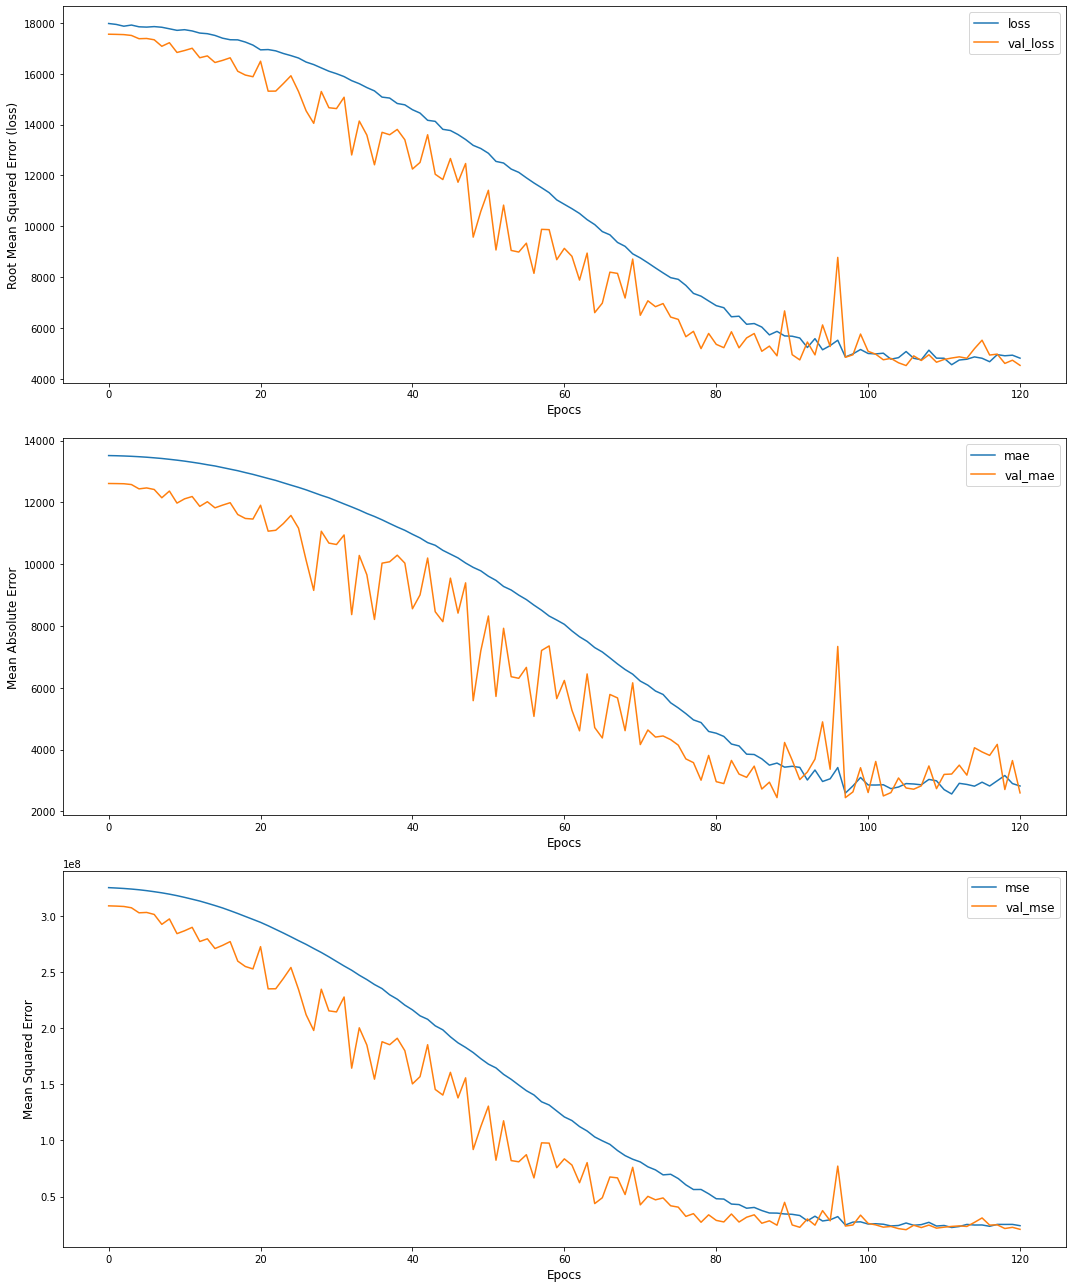

In [157]:
epoc_plots(history59)

In [158]:
y_pred59 = model59.predict(X_test)
r2_score(y_test, y_pred59) 

0.8706681957248306

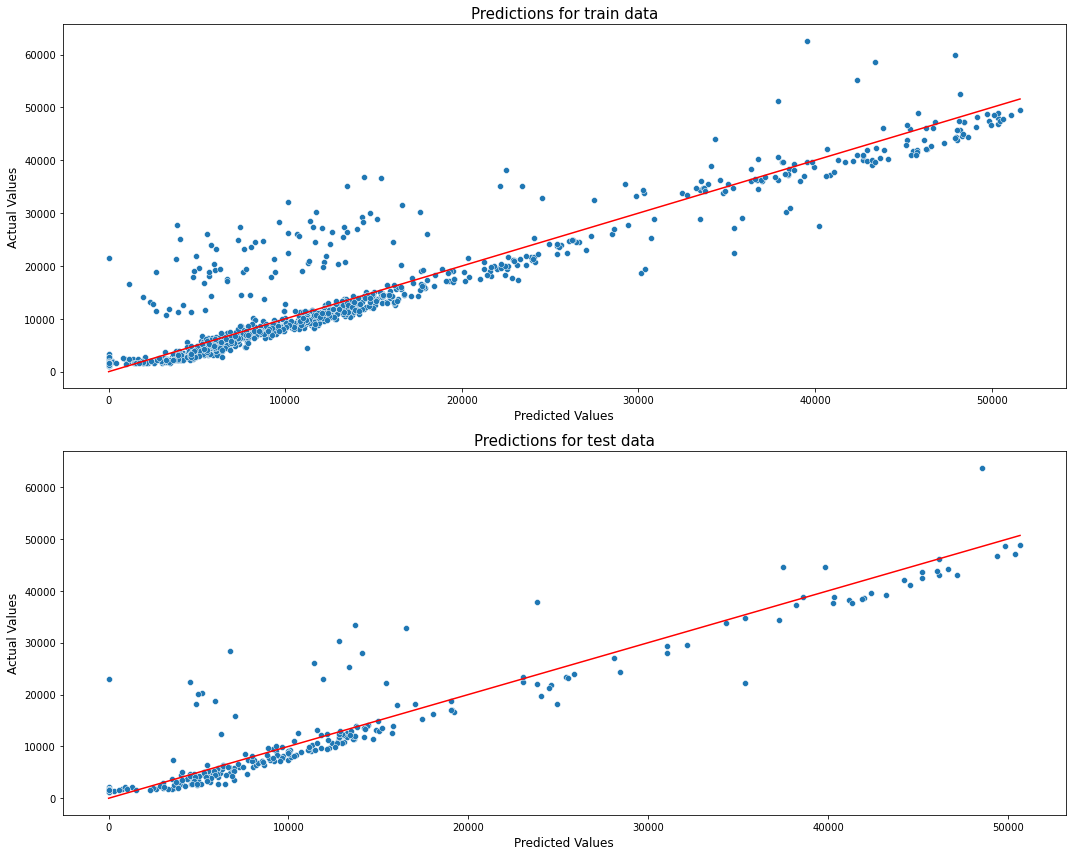

In [159]:
regression_plots(y_pred59, model59)

In [160]:
check_min_max(y_pred59)

Predicted values

max: 50675.84765625
min: 0.0

Actual values

max: 63770.42801
min: 1131.5066


In [161]:
# I like this model a lot more
# slightly less r2 than before, but a lot less param count
# and also the prediction distribution is much more sleak
# like the model knows what it wants, its not everywhere

# let me try to increase the layers while keeping the param count same
# and see what happens

In [252]:
# param count: 12,289 (+512)
model60 = Sequential() 

model60.add(Dense(32, input_dim=6))
model60.add(BatchNormalization())
model60.add(Activation(ELU()))

model60.add(Dense(32))
model60.add(BatchNormalization())
model60.add(Activation(ELU()))

for _ in range(3):
    model60.add(Dense(64))
    model60.add(BatchNormalization())
    model60.add(Activation(ELU()))
    
model60.add(Dense(1, activation='relu'))

model60.compile(loss=root_mean_squared_error, optimizer=Adam(0.01),
             metrics=['mse', 'mae'])

In [253]:
model60.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_892 (Dense)            (None, 32)                224       
_________________________________________________________________
batch_normalization_846 (Bat (None, 32)                128       
_________________________________________________________________
activation_827 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_893 (Dense)            (None, 32)                1056      
_________________________________________________________________
batch_normalization_847 (Bat (None, 32)                128       
_________________________________________________________________
activation_828 (Activation)  (None, 32)                0         
_________________________________________________________________
dense_894 (Dense)            (None, 64)              

In [254]:
history60 = model60.fit(X_train, y_train, batch_size=64, epochs=300,\
                        verbose=1, validation_split=0.2,\
                       callbacks=EarlyStopping(patience=15))

Epoch 1/300
14/14 [==============================] - 0s 10ms/step - loss: 17921.1680 - mse: 325289632.0000 - mae: 13513.9033 - val_loss: 17570.7793 - val_mse: 309570464.0000 - val_mae: 12625.1904
Epoch 2/300
14/14 [==============================] - 0s 2ms/step - loss: 17926.8770 - mse: 324973056.0000 - mae: 13508.4521 - val_loss: 17549.8184 - val_mse: 308829952.0000 - val_mae: 12606.0840
Epoch 3/300
14/14 [==============================] - 0s 2ms/step - loss: 17915.7520 - mse: 324531904.0000 - mae: 13500.8428 - val_loss: 17577.9785 - val_mse: 309819584.0000 - val_mae: 12640.5996
Epoch 4/300
14/14 [==============================] - 0s 2ms/step - loss: 17872.9375 - mse: 323988928.0000 - mae: 13490.0059 - val_loss: 17500.1152 - val_mse: 307080672.0000 - val_mae: 12567.9980
Epoch 5/300
14/14 [==============================] - 0s 2ms/step - loss: 17881.6660 - mse: 323310560.0000 - mae: 13476.3291 - val_loss: 17373.4551 - val_mse: 302654464.0000 - val_mae: 12437.9521
Epoch 6/300
14/14 [=====

Epoch 43/300
14/14 [==============================] - 0s 2ms/step - loss: 14052.9775 - mse: 201060768.0000 - mae: 10544.8799 - val_loss: 9415.8857 - val_mse: 88975032.0000 - val_mae: 5841.0142
Epoch 44/300
14/14 [==============================] - 0s 2ms/step - loss: 13802.1436 - mse: 196094240.0000 - mae: 10417.9414 - val_loss: 10893.8525 - val_mse: 118877984.0000 - val_mae: 7356.9233
Epoch 45/300
14/14 [==============================] - 0s 2ms/step - loss: 13627.6475 - mse: 190659376.0000 - mae: 10275.8809 - val_loss: 12253.1289 - val_mse: 150408112.0000 - val_mae: 8947.4053
Epoch 46/300
14/14 [==============================] - 0s 2ms/step - loss: 13503.1289 - mse: 185181072.0000 - mae: 10109.1064 - val_loss: 10476.5938 - val_mse: 110055752.0000 - val_mae: 7146.9424
Epoch 47/300
14/14 [==============================] - 0s 2ms/step - loss: 13375.2744 - mse: 181545216.0000 - mae: 9996.5049 - val_loss: 12756.0039 - val_mse: 163188736.0000 - val_mae: 9488.5156
Epoch 48/300
14/14 [========

Epoch 86/300
14/14 [==============================] - 0s 2ms/step - loss: 5793.1016 - mse: 34803320.0000 - mae: 3422.3093 - val_loss: 5468.9043 - val_mse: 30307574.0000 - val_mae: 3053.6680
Epoch 87/300
14/14 [==============================] - 0s 2ms/step - loss: 5696.3667 - mse: 34325092.0000 - mae: 3457.2515 - val_loss: 4915.0918 - val_mse: 24383814.0000 - val_mae: 2941.5137
Epoch 88/300
14/14 [==============================] - 0s 2ms/step - loss: 5528.1753 - mse: 32209832.0000 - mae: 3222.9578 - val_loss: 5121.9565 - val_mse: 26484496.0000 - val_mae: 3788.1519
Epoch 89/300
14/14 [==============================] - 0s 2ms/step - loss: 5422.5264 - mse: 31214218.0000 - mae: 3109.0129 - val_loss: 4989.8486 - val_mse: 25290804.0000 - val_mae: 2535.9668
Epoch 90/300
14/14 [==============================] - 0s 2ms/step - loss: 5219.1885 - mse: 27848314.0000 - mae: 2998.5981 - val_loss: 5099.1450 - val_mse: 26093186.0000 - val_mae: 3423.3716
Epoch 91/300
14/14 [==============================

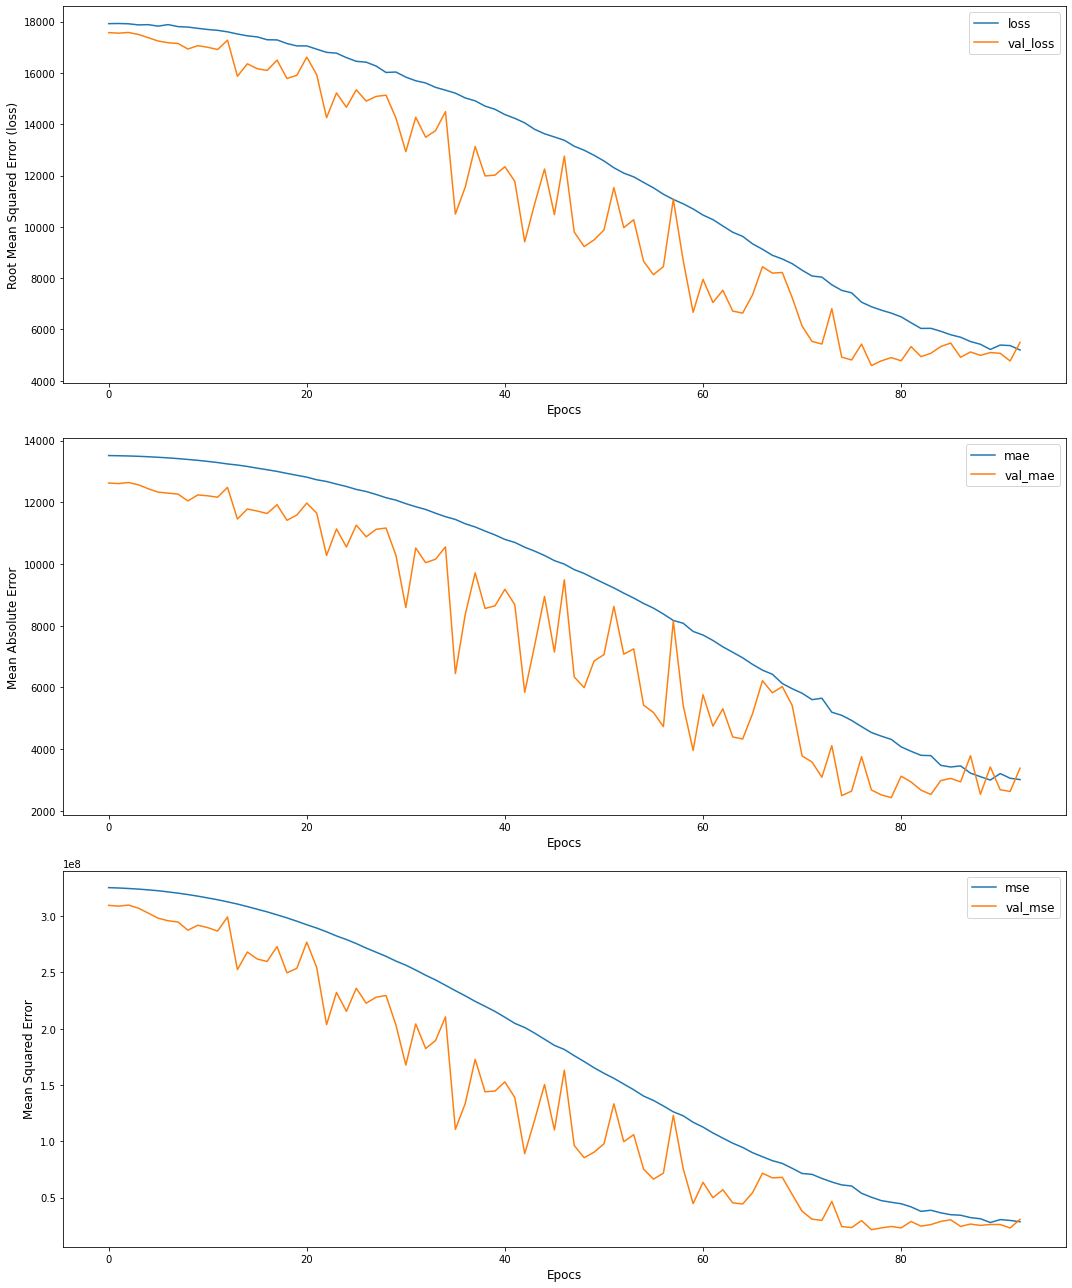

In [255]:
epoc_plots(history60)

In [256]:
y_pred60 = model60.predict(X_test)
r2_score(y_test, y_pred60) 

0.8132295057643041

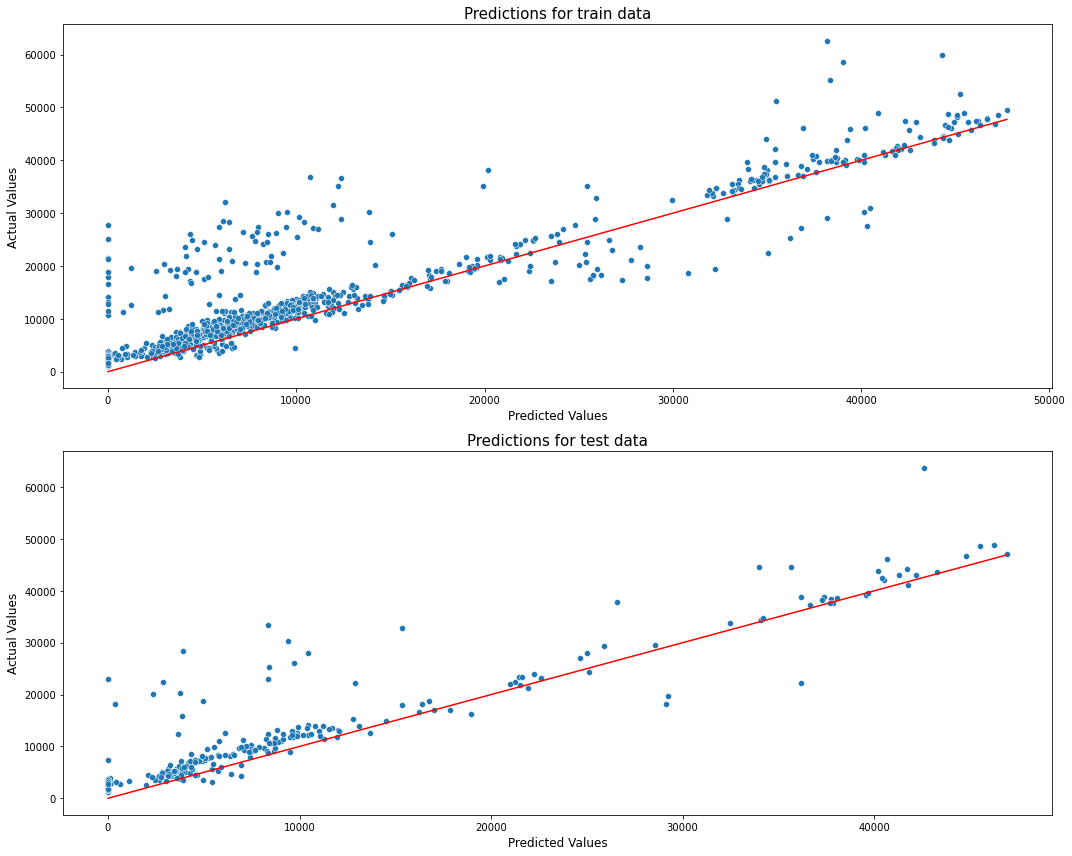

In [257]:
regression_plots(y_pred60, model60)

In [258]:
check_min_max(y_pred60)

Predicted values

max: 46929.4375
min: 0.0

Actual values

max: 63770.42801
min: 1131.5066
